# Assignment 5

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72

import pandas as pd
import numpy as np
import seaborn as sns
import random


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("./heart_dataset.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [4]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [5]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# One-hot encoding these 4 columns
columns_to_encode = ['RestingECG', 'ChestPainType', "ExerciseAngina", "Sex"]
df = pd.get_dummies(df, columns=columns_to_encode)

In [8]:
st_order = ['Down', 'Flat', 'Up']
# Encode this ordinally, because there is a direction here
ordinal_encoder = OrdinalEncoder(categories=[st_order])

df['ST_Slope'] = ordinal_encoder.fit_transform(df[['ST_Slope']])
    
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,Sex_F,Sex_M
0,40,140,289,0,172,0.0,2.0,0,0,1,0,0,1,0,0,1,0,0,1
1,49,160,180,0,156,1.0,1.0,1,0,1,0,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0.0,2.0,0,0,0,1,0,1,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1.0,1,0,1,0,1,0,0,0,0,1,1,0
4,54,150,195,0,122,0.0,2.0,0,0,1,0,0,0,1,0,1,0,0,1


In [9]:
# standardizing all values so SVM doesnt take an eternity
# df.head()
scaler = StandardScaler()
columns_to_standardize = ['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ST_Slope']
# data_to_standardize = df[columns_to_standardize].values
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
# something = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,Sex_F,Sex_M
0,40,0.410909,0.825070,-0.551341,1.382928,-0.832432,1.052114,0,0,1,0,0,1,0,0,1,0,0,1
1,49,1.491752,-0.171961,-0.551341,0.754157,0.105664,-0.596078,1,0,1,0,0,0,1,0,1,0,1,0
2,37,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,1.052114,0,0,0,1,0,1,0,0,1,0,0,1
3,48,0.302825,0.139040,-0.551341,-1.132156,0.574711,-0.596078,1,0,1,0,1,0,0,0,0,1,1,0
4,54,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,1.052114,0,0,1,0,0,0,1,0,1,0,0,1


In [10]:
# Sanity Check

X = df.loc[:, df.columns != 'HeartDisease'].values
y = df.loc[:, df.columns == 'HeartDisease'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8315217391304348


### Question 1

In [11]:
# 10-fold CV evaluation of a classifier
def eval_classifier(_clf, _X, _y):
    accuracies = []
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        accuracies += [accuracy_score(_y[test_index], y_pred)]
    return np.array(accuracies)

In [12]:
acc = eval_classifier(GaussianNB(), X, y)
print(f'Naive Bayes CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Naive Bayes CV accuracy=0.84 ±0.028


In [13]:
acc = eval_classifier(SVC(kernel='linear', probability=True), X, y)
print(f'SVM RBF CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

SVM RBF CV accuracy=0.86 ±0.024


In [14]:
acc = eval_classifier(MLPClassifier(max_iter=500), X, y)
print(f'Neural Network CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Neural Network CV accuracy=0.86 ±0.022


In [15]:
acc = eval_classifier(DecisionTreeClassifier(), X, y)
print(f'Decision Tree CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Decision Tree CV accuracy=0.79 ±0.041


In [16]:
acc = eval_classifier(RandomForestClassifier(), X, y)
print(f'Random Forest CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Random Forest CV accuracy=0.87 ±0.027


### Question 2

In [17]:
%%time

classifiers = [
    ('GaussianNB', GaussianNB()),
    ('Linear SVC', SVC(kernel='linear', probability=True)),
    # I changed this from assignment directions because it did not converge with those params
    ('MLPClassifier', MLPClassifier(hidden_layer_sizes=(50,100),max_iter=500, tol=1e-1)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=5, max_features=5))
]

ensemble_size = 100

ensemble_classifiers = []

# Generate ensembles
for name, clf in classifiers:
    ensemble = []
    for _ in range(ensemble_size):
        weak_clf = clone(clf)
        ensemble.append(weak_clf)
    ensemble_classifiers.append(ensemble)

# Report the first classifier's performance in each ensemble
for i, (name, _) in enumerate(classifiers):
    # The first weak classifier
    clf = ensemble_classifiers[i][0]
    scores = eval_classifier(clf, X, y)
    print(f"{name} Ensemble - First Classifier: {scores.mean():.2f}{chr(177)}{scores.std():.3f}")

GaussianNB Ensemble - First Classifier: 0.84±0.028
Linear SVC Ensemble - First Classifier: 0.86±0.024
MLPClassifier Ensemble - First Classifier: 0.82±0.047
DecisionTreeClassifier Ensemble - First Classifier: 0.83±0.047
CPU times: user 6.17 s, sys: 181 ms, total: 6.35 s
Wall time: 1.7 s


### Question 3

In [18]:
def ensemble_fit(_clfs, _X, _y, subsample_ratio):
    N, ix = _X.shape[0], None
    for c in _clfs:
        bCheck=True
        while bCheck:
            # Random sampling
            ix = random.sample(range(N), int(subsample_ratio*N))
            # Ensures we have at least 2 unique classes in subsample
            if len(np.unique(_y[ix])) < 2:
                continue
            if len(np.unique(_y[ix]))==2:
                bCheck=False
            c.fit(_X[ix,:], _y[ix])

### Question 4

In [19]:
def ensemble_predict(_clfs, _X):
    N = _X.shape[0]
    ypred_scores = np.zeros((N, 2))
    for c in _clfs:
        pred = c.predict_proba(_X)
        for i in range(N):
            ypred_scores[i] += pred[i]
        ypred = np.argmax(ypred_scores, axis=1)
    return ypred

### Refactoring eval_classfier for ensembles

In [20]:
# 10-fold CV evaluation of an ensemble classifier
# This is a modification of the eval_classifier above
# which utilizes the ensemble_fit and predict methods
def eval_classifier_sampling(_clf, _X, _y, subsample_ratios):
    accuracies = []
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    for ratio in subsample_ratios:
        for train_index, test_index in kf.split(_X, _y):
            ensemble_fit(_clf, _X[train_index], _y[train_index], ratio)
            y_pred = ensemble_predict(_clf, _X[test_index])
            accuracies += [accuracy_score(_y[test_index], y_pred)]
    return np.array(accuracies)

### Question 5

In [21]:
%%time

subsample_ratios = [0.2, 0.05]

for ratio in subsample_ratios:
    print(f"Subsample Ratio: {ratio}")
    regular_clf = DecisionTreeClassifier(max_depth=5, max_features=5)
    
    ensemble_clfs = [
        ('GaussianNB Ensemble', ensemble_classifiers[0]),
        ('Linear SVC Ensemble', ensemble_classifiers[1]),
        ('MLPClassifier Ensemble', ensemble_classifiers[2]),
        ('DecisionTreeClassifier Ensemble', ensemble_classifiers[3])
    ]
    
    for name, clf in ensemble_clfs:
        scores = eval_classifier_sampling(clf, X, y, subsample_ratios)
        print(f"{name}: {scores.mean():.2f} {chr(177)}{scores.std():.3f}")
    

    scores_regular = eval_classifier_sampling([regular_clf], X, y, subsample_ratios)
    print(f"Regular Decision Tree: {scores_regular.mean():.2f} {chr(177)}{scores_regular.std():.3f}")
    print('----------------')

Subsample Ratio: 0.2
GaussianNB Ensemble: 0.83 ±0.032
Linear SVC Ensemble: 0.86 ±0.023
MLPClassifier Ensemble: 0.61 ±0.044
DecisionTreeClassifier Ensemble: 0.86 ±0.040
Regular Decision Tree: 0.77 ±0.075
----------------
Subsample Ratio: 0.05
GaussianNB Ensemble: 0.84 ±0.033
Linear SVC Ensemble: 0.86 ±0.026
MLPClassifier Ensemble: 0.61 ±0.044
DecisionTreeClassifier Ensemble: 0.86 ±0.032
Regular Decision Tree: 0.77 ±0.051
----------------
CPU times: user 6min 26s, sys: 1min 4s, total: 7min 30s
Wall time: 1min 22s


### Question 6

Subsample Ratio: 0.005
GaussianNB Ensemble: 0.83 ±0.034
Linear SVC Ensemble: 0.77 ±0.153
MLPClassifier Ensemble: 0.59 ±0.074
DecisionTreeClassifier Ensemble: 0.85 ±0.041
Regular Decision Tree: 0.73 ±0.095
----------------
Subsample Ratio: 0.01
GaussianNB Ensemble: 0.83 ±0.037
Linear SVC Ensemble: 0.78 ±0.140
MLPClassifier Ensemble: 0.61 ±0.064
DecisionTreeClassifier Ensemble: 0.85 ±0.037
Regular Decision Tree: 0.68 ±0.132
----------------
Subsample Ratio: 0.03
GaussianNB Ensemble: 0.83 ±0.031
Linear SVC Ensemble: 0.78 ±0.125
MLPClassifier Ensemble: 0.61 ±0.076
DecisionTreeClassifier Ensemble: 0.85 ±0.037
Regular Decision Tree: 0.72 ±0.099
----------------
Subsample Ratio: 0.05
GaussianNB Ensemble: 0.83 ±0.033
Linear SVC Ensemble: 0.78 ±0.132
MLPClassifier Ensemble: 0.60 ±0.061
DecisionTreeClassifier Ensemble: 0.85 ±0.038
Regular Decision Tree: 0.71 ±0.108
----------------
Subsample Ratio: 0.1
GaussianNB Ensemble: 0.83 ±0.035
Linear SVC Ensemble: 0.78 ±0.141
MLPClassifier Ensemble: 0.61

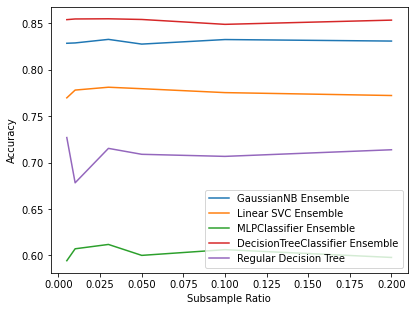

CPU times: user 36min 6s, sys: 7min 34s, total: 43min 41s
Wall time: 7min 19s


In [22]:
%%time

subsample_ratios = [0.005, 0.01, 0.03, 0.05, 0.1, 0.2]
# subsample_ratios = [0.005, 0.01]

accuracies = {
    'GaussianNB Ensemble': [],
    'Linear SVC Ensemble': [],
    'MLPClassifier Ensemble': [],
    'DecisionTreeClassifier Ensemble': []
}
accuracies_regular_dt = []

for ratio in subsample_ratios:
    print(f"Subsample Ratio: {ratio}")
    
    # Setting up a set of tuples for the ensembles that were created above
    ensemble_clfs = [
        ('GaussianNB Ensemble', ensemble_classifiers[0]),
        ('Linear SVC Ensemble', ensemble_classifiers[1]),
        ('MLPClassifier Ensemble', ensemble_classifiers[2]),
        ('DecisionTreeClassifier Ensemble', ensemble_classifiers[3])
    ]
    
    # for each subsample, and each ensemble, evaluate and set accuracy scores
    for name, clf in ensemble_clfs:
        scores = eval_classifier_sampling(clf, X, y, subsample_ratios)
        accuracies[name].append(scores.mean())
        print(f"{name}: {scores.mean():.2f} {chr(177)}{scores.std():.3f}")

    scores_regular_dt = eval_classifier_sampling([DecisionTreeClassifier(max_depth=5, max_features=5)], X, y, subsample_ratios)
    accuracies_regular_dt.append(scores_regular_dt.mean())
    print(f"Regular Decision Tree: {scores_regular_dt.mean():.2f} {chr(177)}{scores_regular_dt.std():.3f}")
    print('----------------')



# Plot the accuracy scores for the ensembles
for name, accuracies in accuracies.items():
    if len(accuracies) != 0:
        plt.plot(subsample_ratios, accuracies, label=name)

# Plot the accuracy scores for the normal decision tree
plt.plot(subsample_ratios, accuracies_regular_dt, label="Regular Decision Tree")

plt.xlabel('Subsample Ratio')
plt.ylabel('Accuracy')
plt.legend()
plt.show()